## Project work for "Business Analytics"

Author: Dr. Stephan Hausberg

title: battery drain, impact and chances

sources: dataset taken from kaggle, October 28 2024
notebook merger of notebooks by Samanyuk (https://www.kaggle.com/code/samanyuk/user-behavior-class-100-accuracy) and Pavan Kumar (https://www.kaggle.com/code/pavankumar4757/predicting-user-behavior-battery-drain-100)

situation: Your are the data analyst in a company that produces mobile devices (in the supply chain for Apple). In the supply chain your are not directly selling phones to customers. The mobile devices are being rebranded and sold by a third party. So you do not have access to direct customer feedback. In a first feedback from the third party, the company should take a closer look at batteries and if there is room to improve.

This seems to be a very open question. So, we formulate this into an adequate business question:

### 1. Business problem

The customer satisfaction seems to have dropped because the battery drain is higher than with other devices. To increase customer satisfactory again, we would like to know which part compared to other mobile devices has the highest impact on battery drain?

From a business case perspective, customer satisfactory is crucial for market share. People know that battery drain is high with your models, then they are not buying your goods. So, this problem is crucial to fix, such that there are no more rumours about it. Currently our market share is 17%, and it decreases by 1%, then this should manifest in 100K Euros decrease in revenue in the next 6 months. If we find an exact issue to fix this, how much money do we have to spend to fix it? What process steps in our manufacturing steps are affected? 

### 2. Analytics problem

The business problem only describes the tip of the iceberg. Custuomer satisfaction will not be a feature we find somewhere, unless we make a survey for our company and find out about it. Since this takes too long time, we take what we have and this is a dataset in first place we have found online to deduce some insights to our management.

With the feature "battery drain" we also find customer behavior in a dataset and we could deduce what might be the leveraging feature that leads to battery drain and also might find out, if it is just our company that is affect or also the other companies.

### 3.  Allocation

We have formulated business and analytics problems. To solve this, we find a dataset on kaggle, which is highly curated and might help us find first insights about our issue. However, this is not the largest dataset and therefore a simple local infrastructure or free online capacities are sufficient for this task. If this would happen in a business context, take care on security issues and where you load your data to or from. Please check source and usage permissions first. From a personnel point of view this is also easily solved, since there is just a one person needed to extract, transform, load data and to analyze this and draw take-aways from it.

#### 4. Analytics

To find out, what root causes could be derived, we load data, packages and perform a first exploratory data analysis.

### EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv(r"project_battery_drain_user_behavior_dataset.csv")

In [ ]:
df.info()

In [ ]:
tdf=df['Device Model'].value_counts().reset_index()
tdf1=df['Operating System'].value_counts().reset_index()
tdf2=df['Gender'].value_counts().reset_index()
fig,ax=plt.subplots(1,3,figsize=(15,6))
ax[0].pie(x=tdf['count'],labels=tdf['Device Model'],autopct='%.2f%%')
ax[0].set_title("Distribution of Phone Brands")
ax[1].pie(x=tdf1['count'],labels=tdf1['Operating System'],autopct='%.2f%%')
ax[1].set_title("Distribution of Operating System")
ax[2].pie(x=tdf2['count'],labels=tdf2['Gender'],autopct='%.2f%%')
ax[2].set_title("Distribution of Gender")
plt.show()

In [ ]:
df.head()

**Findings**

1. This dataset contains 5 different Phone brands. All of them constitute around 20 percent of the dataset each
2. Two types of Operating systems, Android makes up aroung 80 percent of the dataset (makes sense cause 4 out of 5 phone brands use Android :) )
3. Dataset contains a balanced ratio of Male to Female

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Device Model',hue='Gender',ax=ax[0][0])
sns.countplot(data=df,x='Operating System',hue='Gender',ax=ax[0][1])
sns.scatterplot(data=df,y='Device Model',x='Age',hue='Gender',ax=ax[1][0])
sns.scatterplot(data=df,y='Operating System',x='Age',hue='Gender',ax=ax[1][1])
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette = 'coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()

In [ ]:
Test

In [ ]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette='coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()

Predictions for Battery Drain

In [ ]:
X = df.drop(['User ID', 'Battery Drain (mAh/day)'], axis=1)   
y = df['Battery Drain (mAh/day)']

categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred))

if hasattr(model.named_steps['regressor'], 'feature_importances_'):
   
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances for Battery Drain Prediction')
    plt.show()

#### 5. Wrap Up for the management / Preparation

It is not suitable to present the whole EDA and your findings to the management. Golden rule: Use McKs pyramid principle and KISS-principle.

This will be part of the lecture in the upcoming weeks, but here a few outlooks on how this could look like.

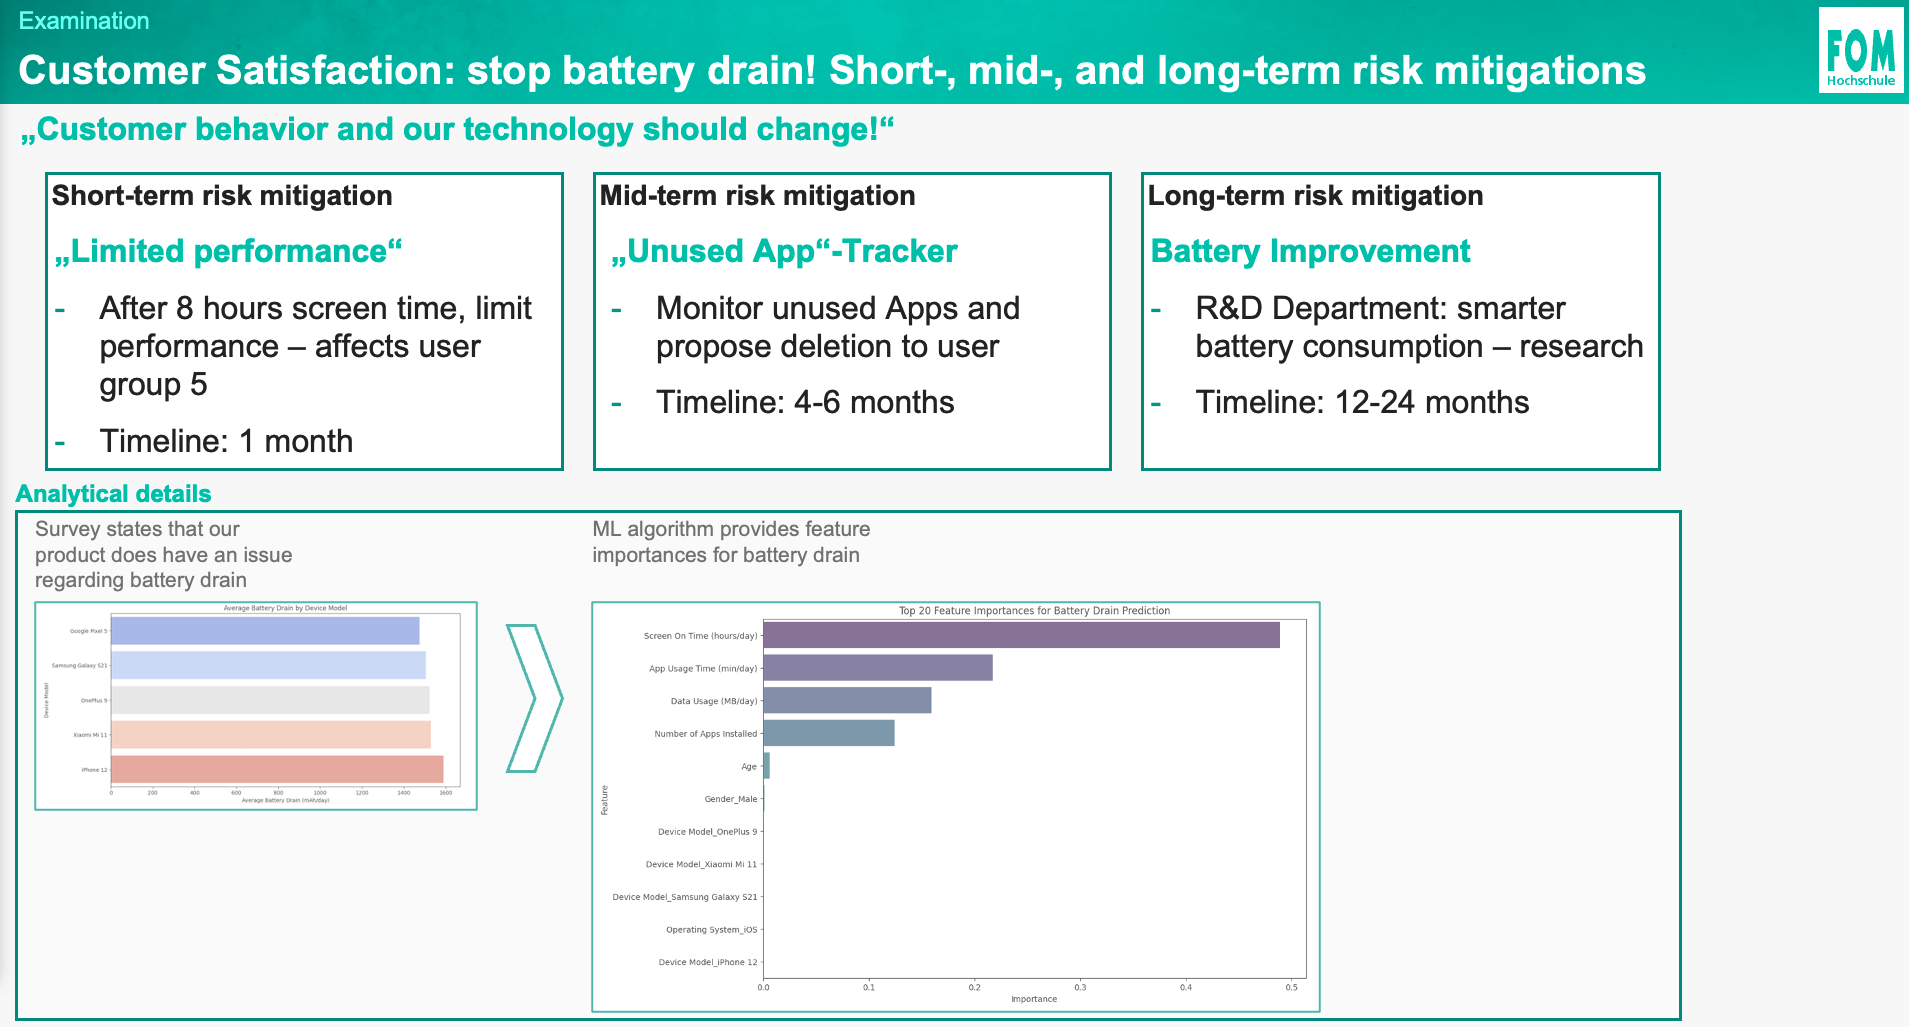